# Hotel Booking Cancellations Prediction

### Imports 

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

### Load data

In [2]:
df = pd.read_csv('./data/hotel-bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

### Exploratory Data Analysis (EDA) 

In [4]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


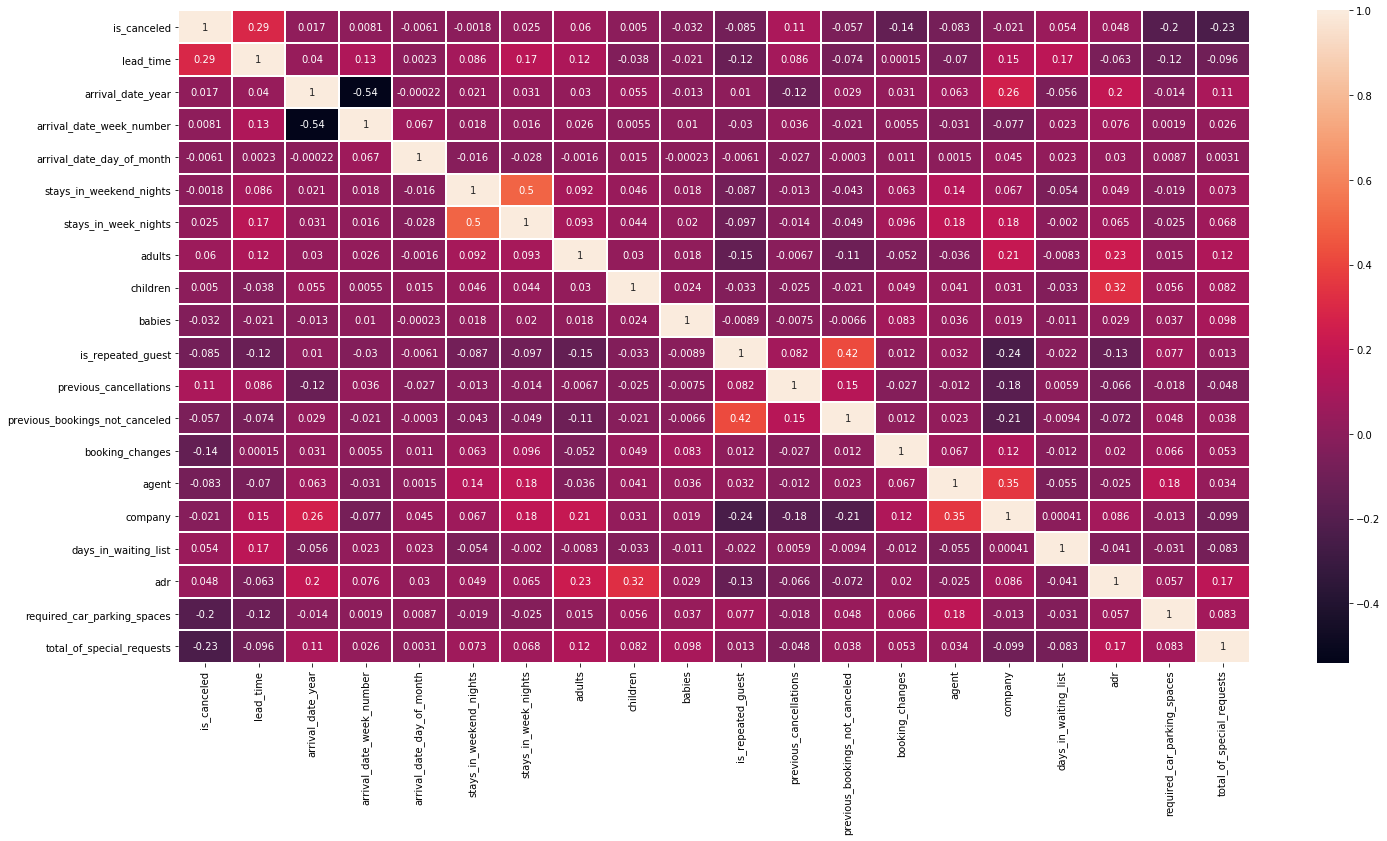

In [5]:
plt.figure(figsize=(24, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Drop columns that are possibly redundant and correlated 

In [7]:
df.drop(['reservation_status', 
         'days_in_waiting_list', 
         'hotel', 
         'reserved_room_type', 
         'reservation_status_date', 
         'arrival_date_month', 
         'arrival_date_day_of_month', 
         'arrival_date_week_number', 
         'arrival_date_year', 
         'babies', 
         'adults', 
         'agent', 
         'company'], 
        axis=1, 
        inplace=True)

### Drop duplicate rows

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(86029, 19)

In [10]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,Transient,0.0,0,0
1,0,737,0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,Transient,0.0,0,0
2,0,7,0,1,0.0,BB,GBR,Direct,Direct,0,0,0,C,0,No Deposit,Transient,75.0,0,0
3,0,13,0,1,0.0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,Transient,75.0,0,0
4,0,14,0,2,0.0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,98.0,0,1


### Handle missing values

Lets look into the numbers of children accompanying the adults since there are few missing values in children column

In [11]:
df.children.value_counts()

0.0     77675
1.0      4686
2.0      3588
3.0        75
10.0        1
Name: children, dtype: int64

Majority of the visitors were not accompanied by children and hence missing data can be replaced by number of children = 0

In [12]:
df.children.fillna(value=0.0, inplace=True)

In [13]:
df.country.value_counts()

PRT    26478
GBR    10380
FRA     8741
ESP     7213
DEU     5357
       ...  
UMI        1
MMR        1
GUY        1
NIC        1
ASM        1
Name: country, Length: 177, dtype: int64

Iterating the country column by running CountryCoverter revealded that, most of the clients were from Europe. 
Therefore all missing values are replaced with the country of maximum occurance - Portugal (PRT)

In [14]:
df.country.fillna(value='PRT', inplace=True)

In [15]:
df.isna().sum()

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [23]:
df.is_canceled.value_counts()

0    62440
1    23589
Name: is_canceled, dtype: int64

### Handling numeric and categorical columns

In [16]:
numerical = [var for var in df.columns if df[var].dtypes != 'object']
numerical

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'children',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [17]:
categorical = [var for var in df.columns if df[var].dtypes == 'object']
categorical

['meal',
 'country',
 'market_segment',
 'distribution_channel',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [18]:
df.shape

(86029, 19)

In [19]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,Transient,0.0,0,0
1,0,737,0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,Transient,0.0,0,0
2,0,7,0,1,0.0,BB,GBR,Direct,Direct,0,0,0,C,0,No Deposit,Transient,75.0,0,0
3,0,13,0,1,0.0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,Transient,75.0,0,0
4,0,14,0,2,0.0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,Transient,98.0,0,1


### Scale numeric columns using Min-Max scaler

In [20]:
scaler = MinMaxScaler()

In [21]:
df.stays_in_weekend_nights.value_counts()

0     34225
2     26247
1     22397
4      1728
3      1145
6       113
5        69
8        59
7        15
9         9
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
df[['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'children',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']] = scaler.fit_transform(df[['lead_time',
                                                         'stays_in_weekend_nights',
                                                         'stays_in_week_nights',
                                                         'children',
                                                         'is_repeated_guest',
                                                         'previous_cancellations',
                                                         'previous_bookings_not_canceled',
                                                         'booking_changes',
                                                         'adr',
                                                         'required_car_parking_spaces',
                                                         'total_of_special_requests']])

In [ ]:
df.head()

### One-hot encode categorical columns

In [ ]:
categorical_cols = ['meal',
 'country',
 'market_segment',
 'distribution_channel',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [ ]:
df = pd.get_dummies(df, columns = categorical_cols)

In [ ]:
df.head()

In [ ]:
df.shape

### Create Train/Test splits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'is_canceled'], df['is_canceled'], test_size=0.2)

### Train a classifier

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

### Predict and evaluate

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
print(classification_report(y_test, predictions))